# **Analysis of factors that affect used car prices**

# **Imports**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from collections import Counter
from IPython.display import display
from sklearn.impute import KNNImputer
from pylab import rcParams
from pathlib import Path

# **Data Loading**

The uncleaned data is loaded

In [2]:
path='/kaggle/input/uncovering-factors-that-affect-used-car-prices/autos.csv'

In [3]:
data = pd.read_csv(path, lineterminator='\n')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

In [5]:
data.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


# **Cleaned Data Loading**

In [6]:
path='/kaggle/input/factors/autos.csv'

In [7]:
data = pd.read_csv(path, lineterminator='\n')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244083 entries, 0 to 244082
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                244083 non-null  int64 
 1   dateCrawled          244083 non-null  object
 2   name                 244083 non-null  object
 3   seller               244083 non-null  object
 4   offerType            244083 non-null  object
 5   price                244083 non-null  int64 
 6   abtest               244083 non-null  object
 7   vehicleType          244083 non-null  object
 8   yearOfRegistration   244083 non-null  int64 
 9   gearbox              244083 non-null  object
 10  powerPS              244083 non-null  int64 
 11  model                244083 non-null  object
 12  kilometer            244083 non-null  int64 
 13  monthOfRegistration  244083 non-null  int64 
 14  fuelType             244083 non-null  object
 15  brand                244083 non-nu

The cleaned data gives an idea of how many cells contained null values.

In [9]:
data.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen\r
0,1,17-03-2016 16:54,GOLF_4_1_4__3TÜRER,Private,Offer,1500,test,Hatchback,2001,Manual,75,golf,150000,6,Petrol,volkswagen,No,17-03-2016 00:00,91074,17-03-2016 17:40\r
1,2,31-03-2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,Private,Offer,3600,test,Hatchback,2008,Manual,69,fabia,90000,7,Diesel,skoda,No,31-03-2016 00:00,60437,06-04-2016 10:17\r
2,5,04-04-2016 17:36,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,Private,Offer,650,test,limousine,1995,Manual,102,3er,150000,10,Petrol,bmw,Yes,04-04-2016 00:00,33775,06-04-2016 19:17\r
3,6,01-04-2016 20:48,Peugeot_206_CC_110_Platinum,Private,Offer,2200,test,Convertible,2004,Manual,109,2_reihe,150000,8,Petrol,peugeot,No,01-04-2016 00:00,67112,05-04-2016 18:18\r
4,10,26-03-2016 19:54,Mazda_3_1.6_Sport,Private,Offer,2000,control,limousine,2004,Manual,105,3_reihe,150000,12,Petrol,mazda,No,26-03-2016 00:00,96224,06-04-2016 10:45\r


The cleaned data includes removing rows with null values , replacing German terms with English and adjusting the placements of the remaining rows. 

# Exploratory Data Analysis

**Numeric features**

The numeric features of the dataset analysed visually.

**Check for missing values**

In [10]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

index                  0
dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
lastSeen\r             0
dtype: int64


**Price with respect to distribution**

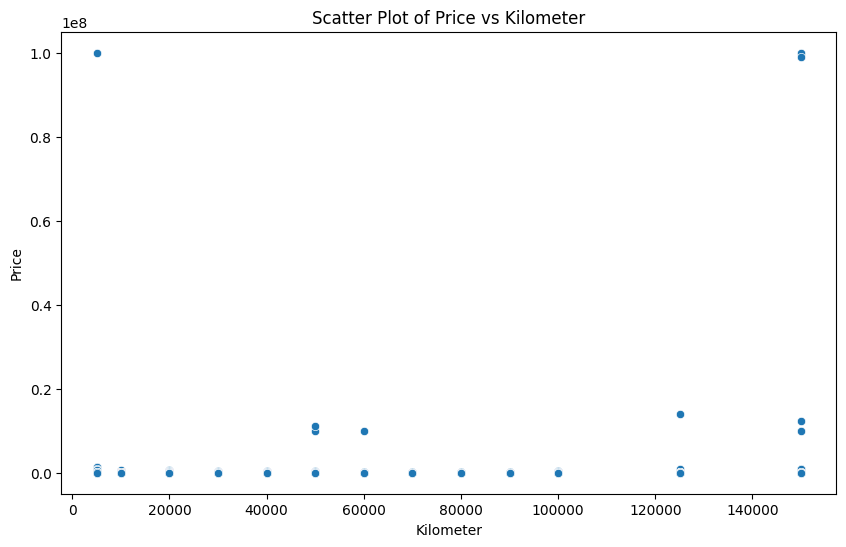

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['kilometer'], y=data['price'])
plt.title('Scatter Plot of Price vs Kilometer')
plt.xlabel('Kilometer')
plt.ylabel('Price')
plt.show()

**Year of Registration**

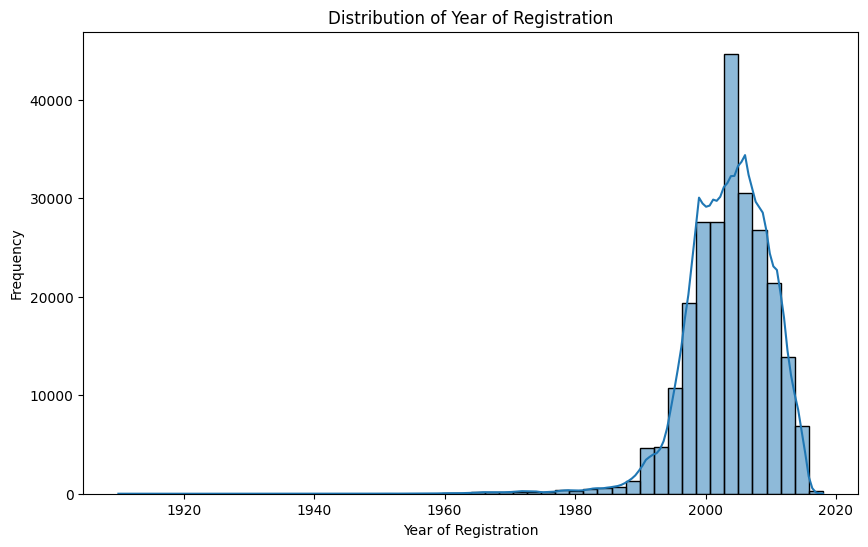

In [12]:
# Plot the distribution of year of registration
plt.figure(figsize=(10, 6))
sns.histplot(data['yearOfRegistration'], bins=50, kde=True)
plt.title('Distribution of Year of Registration')
plt.xlabel('Year of Registration')
plt.ylabel('Frequency')
plt.show()


**Analysis of Vehicle Type**

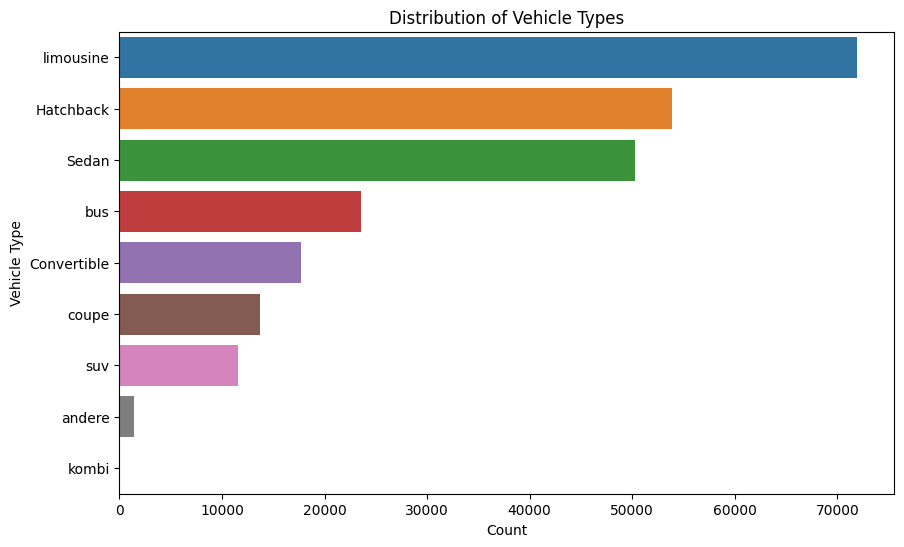

In [13]:
# Plot the distribution of vehicle types
plt.figure(figsize=(10, 6))
sns.countplot(y=data['vehicleType'], order=data['vehicleType'].value_counts().index)
plt.title('Distribution of Vehicle Types')
plt.xlabel('Count')
plt.ylabel('Vehicle Type')
plt.show()

**Analysis of Fuel Type**

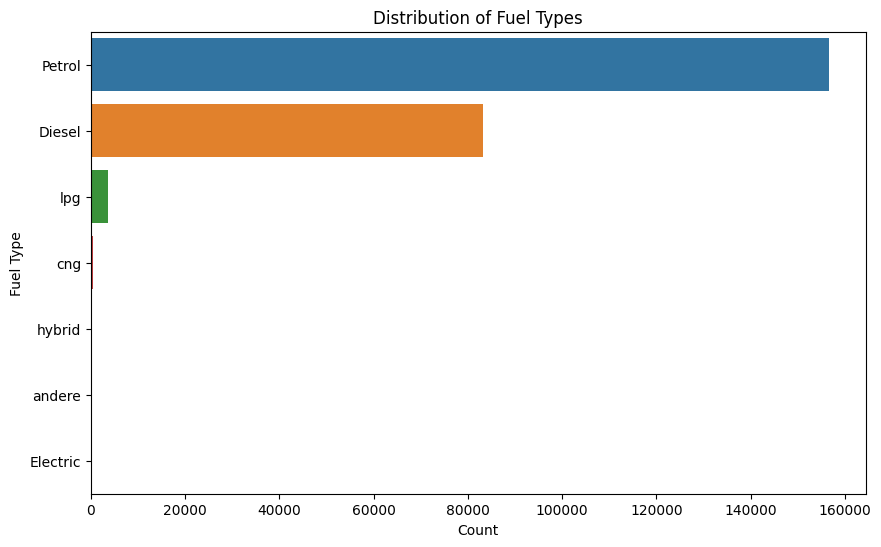

In [14]:
# Plot the distribution of fuel types
plt.figure(figsize=(10, 6))
sns.countplot(y=data['fuelType'], order=data['fuelType'].value_counts().index)
plt.title('Distribution of Fuel Types')
plt.xlabel('Count')
plt.ylabel('Fuel Type')
plt.show()

**Analysis of Gearbox**

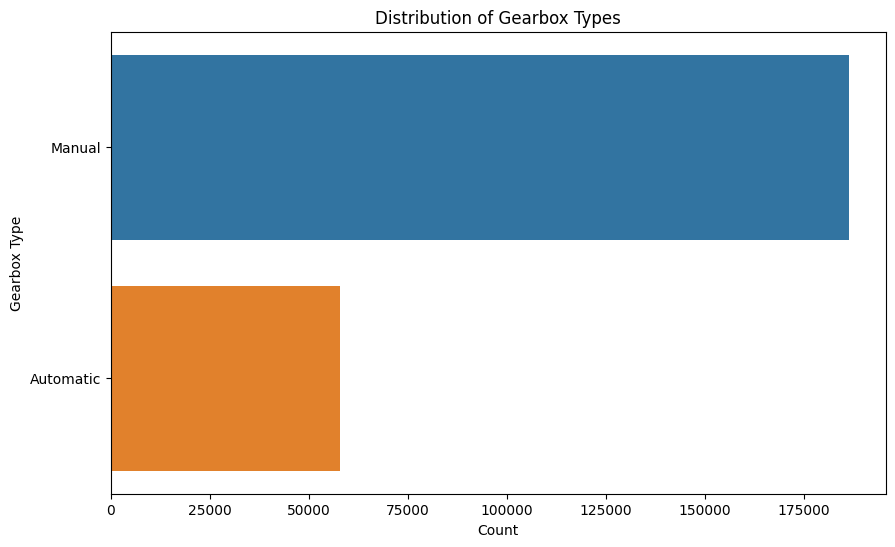

In [15]:
# Plot the distribution of gearbox types
plt.figure(figsize=(10, 6))
sns.countplot(y=data['gearbox'], order=data['gearbox'].value_counts().index)
plt.title('Distribution of Gearbox Types')
plt.xlabel('Count')
plt.ylabel('Gearbox Type')
plt.show()


**Brand Analysis**

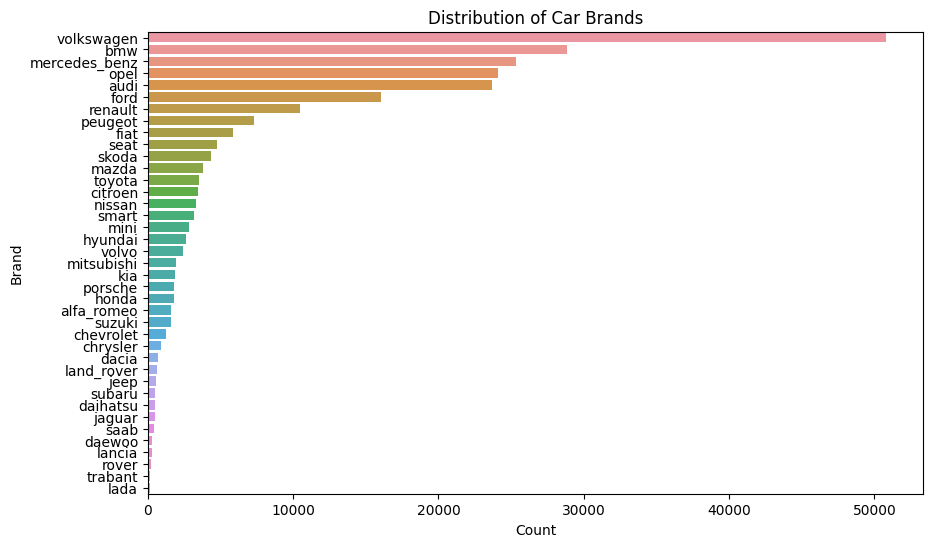

In [16]:
# Plot the distribution of car brands
plt.figure(figsize=(10, 6))
sns.countplot(y=data['brand'], order=data['brand'].value_counts().index)
plt.title('Distribution of Car Brands')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

**Power Analysis**

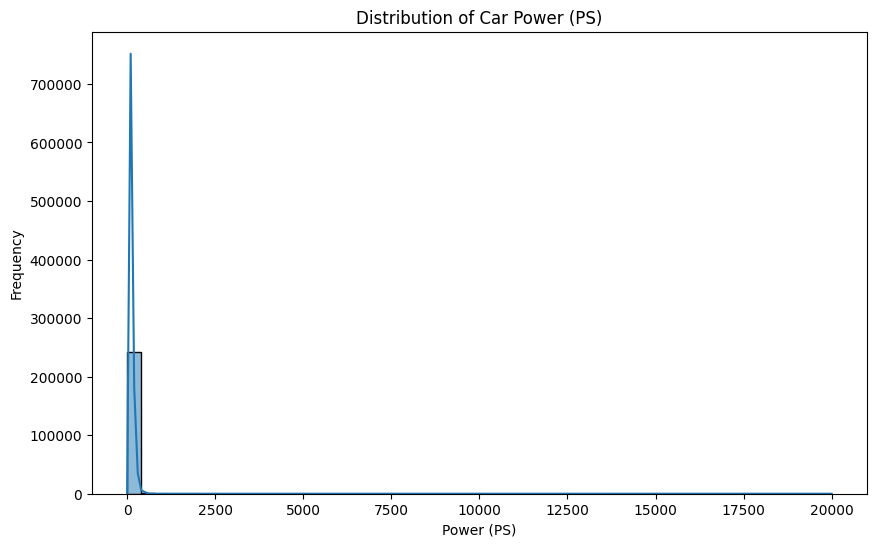

In [17]:
# Plot the distribution of powerPS
plt.figure(figsize=(10, 6))
sns.histplot(data['powerPS'], bins=50, kde=True)
plt.title('Distribution of Car Power (PS)')
plt.xlabel('Power (PS)')
plt.ylabel('Frequency')
plt.show()


# Summary

1. Basic Information and Summary Statistics
The dataset consists of 244,083 entries and 20 columns , with no missing values in any of the columns. Here are some summary statistics:

In [18]:
print(data.describe())

               index         price  yearOfRegistration        powerPS  \
count  244083.000000  2.440830e+05       244083.000000  244083.000000   
mean   186120.214214  8.519281e+03         2003.562911     131.620248   
std    107240.965365  3.540800e+05            6.414189     141.374305   
min         1.000000  0.000000e+00         1910.000000       1.000000   
25%     93173.500000  1.699000e+03         2000.000000      86.000000   
50%    186382.000000  4.000000e+03         2004.000000     116.000000   
75%    278974.500000  8.990000e+03         2008.000000     160.000000   
max    371527.000000  1.000000e+08         2018.000000   20000.000000   

           kilometer  monthOfRegistration     postalCode  
count  244083.000000        244083.000000  244083.000000  
mean   123466.300398             6.367498   52190.261772  
std     39997.544784             3.350871   25803.667201  
min      5000.000000             1.000000    1067.000000  
25%    100000.000000             3.000000   316

2. Distribution of Prices
The prices distribution of cars indicates that most car prices lie within a range of lower prices, while some are priced higher for the high-valued cars.

3. Year of Registration Analysis
The majority of cars are registered between 1990 and 2016, with a peak in the early 2000s.

4. Vehicle Type Analysis
Most common types of vehicles in the listing include limousine and hatchback, station wagons and convertibles.

5. Fuel Type Analysis
Petrol is the most common fuel type, followed by diesel. Other fuel types like LPG and CNG are much less common.

6. Gearbox Analysis
Manual gearboxes are significantly more common than automatic ones.

7. Brand Analysis
Volkswagen, BMW, and Opel are the most common car brands in the dataset.

8. Power Analysis
The distribution of car power (in PS) shows most cars having power below 200 PS.